In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [84]:
def visualize_silhouette(cluster_lists,X_features):
    import matplotlib.cm as cm
    import math
    
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols,4), nrows=1,ncols=n_cols)
    
    for ind, n_cluster in enumerate(cluster_lists):
        # KMeans
        clusterer = KMeans(n_clusters= n_cluster,max_iter=500,random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features,cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower =10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n'\
                           'Silhouette Score : '+ str(round(sil_avg,3)))
        axs[ind].set_xlabels("The silhouette coefficient values")
        axs[ind].set_ylabels("Cluster label")
        axs[ind].set_xlim([-0.1 ,1])
        axs[ind].set_ylim([0,len(X_features)+(n_cluster+1)*10])
        axs[ind].set_yticks([])
        axs[ind],set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1 ])
        
        #클러스터링 갯수별로 막대 그래프 표현
        
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i)/n_cluster)
            axs[ind].fill_betweenx(np.array(y_lower,y_upper),0,ith_cluster_sil_values,\
                                  facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05,y_lower+0.5*size_cluster_i,str(i))
            y_lower =y_upper+10
            
        axs[ind].axvline(x=sil_avg,color="red",linestyle="--")

In [85]:
def visual_multi(lists,X_feaures):
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols,4), nrows=1,ncols=n_cols)
    
    pca= PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    df= pd.DataFrame(pca.transformed,columns=['PCA1','PCA2'])
    
    for ind, n_cluster in enumerate(lists):
        # KMeans
        clusterer = KMeans(n_clusters= n_cluster,max_iter=500,random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        df['cluster'] = cluster_labels
        
        unique_labels= np.unique(clusterer.labels)
        markers=['o','s','^','x','*']
        
        for labels in unique_labels:
            label_df= df[df['cluster']==label]
            if label == -1:
                cluster_legend ='Noise'
            else :
                cluster_legend ='Cluster'+str(label)
            axs[ind].scatter(x=label_df['PCA1'],y=label_df['PCA2'],s=70,\
                            edgecolor='k',marker=markers[label],label=cluster_legend)
            axs[ind].set_title('Number of Cluster: '+ str(n_cluster) )
            axs[ind].legend(loc='upper right')
    plt.show()

In [86]:
def get_min_dist_cluster(pt,centers, n_clusters):
    return np.argmin(np.sqrt(np.sum((pt-centers)**2,axis=1)))
def init_centers(points,n_clusters):
    n_samples, n_features = points.shape
    centers = np.empty((n_clusters,n_features), dtype=points.dtype)
    centers[0] = points[np.random.choice(n_samples,1)]
    for i in range(1, n_clusters):
        centers[i]=points[np.argmax([np.min(np.sqrt(np.sum((pt-centers)**2,axis=1))) for pt in points])]
    return centers

def find_clusters(points,n_clusters):
    centers = init_centers(points,n_clusters)
    
    for _ in range (10):
        labels= np.array([get_min_dist_cluster(pt,centers,n_clusters) for pt in points])
        centers = np.array([np.mean(points[labels==i], axis=0) for i in range(n_clusters)])
    return centers, labels


In [87]:
wine_q = pd.read_csv("C:\winequalityN.csv")

In [88]:
wine_q

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [89]:
wine_q['type']

0       white
1       white
2       white
3       white
4       white
        ...  
6492      red
6493      red
6494      red
6495      red
6496      red
Name: type, Length: 6497, dtype: object

In [90]:
wine_type={'white':0 ,'red':1}

In [91]:
t= []
for i in range(0,len(wine_q['type'])):
    t.append(wine_type[wine_q['type'].iloc[i]])
wine_q['type_num'] = t
wine_q

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_num
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [92]:
wine_q.drop(['type'],axis=1, inplace=True)

In [93]:
wine_type = wine_q['type_num']

In [94]:
wine_q.isna().sum()
# fixed acidity
# volatile acidtiy
#citric acid
#resuidual sugar
# pH
# sulphates
# chlorides

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
type_num                 0
dtype: int64

In [95]:
## Nan 데이터 각 데이터의 평균값으로 채우는 과정

temp = np.sum(wine_q['fixed acidity'])
temp = temp/len(wine_q['fixed acidity'])
wine_q['fixed acidity']=wine_q['fixed acidity'].fillna(temp)

temp = np.sum(wine_q['volatile acidity'])
temp = temp/len(wine_q['volatile acidity'])
wine_q['volatile acidity']=wine_q['volatile acidity'].fillna(temp)

temp = np.sum(wine_q['citric acid'])
temp = temp/len(wine_q['citric acid'])
wine_q['citric acid']=wine_q['citric acid'].fillna(temp)

temp = np.sum(wine_q['sulphates'])
temp = temp/len(wine_q['sulphates'])
wine_q['sulphates']=wine_q['sulphates'].fillna(temp)

temp = np.sum(wine_q['chlorides'])
temp = temp/len(wine_q['chlorides'])
wine_q['chlorides']=wine_q['chlorides'].fillna(temp)

temp = np.sum(wine_q['residual sugar'])
temp = temp/len(wine_q['residual sugar'])
wine_q['residual sugar']=wine_q['residual sugar'].fillna(temp)


temp = np.sum(wine_q['pH'])
temp = temp/len(wine_q['pH'])
wine_q['pH']=wine_q['pH'].fillna(temp)
#np.average(wine_q['fixed acidity'])
wine_q.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_num                0
dtype: int64

<AxesSubplot:>

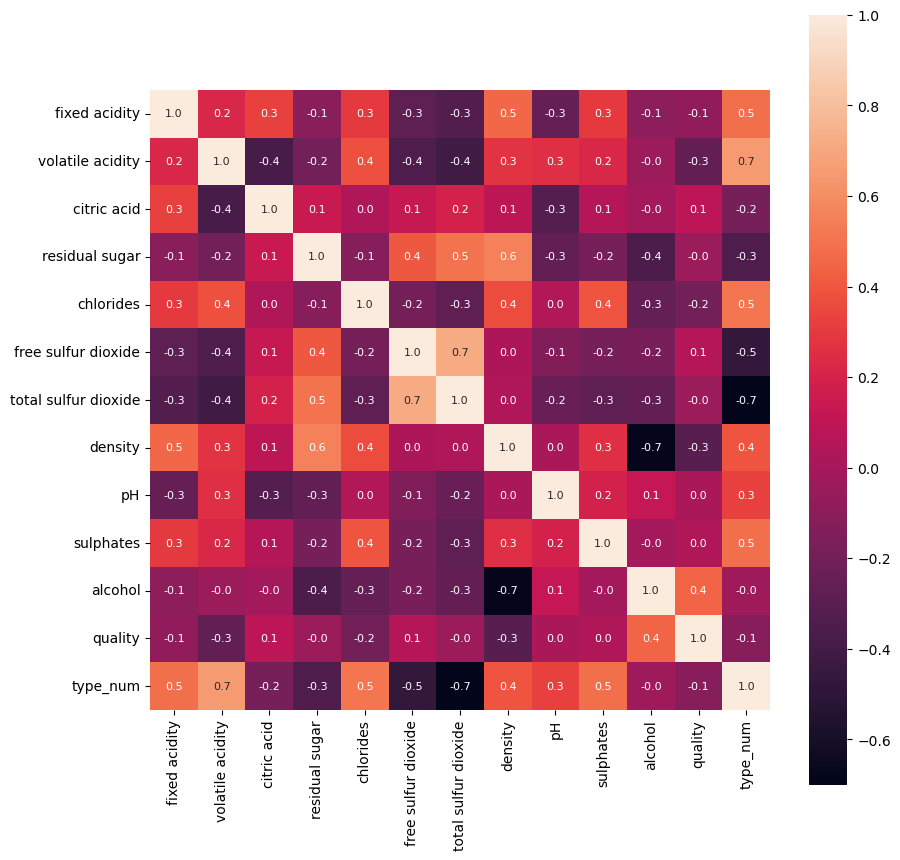

In [96]:
import seaborn as sb
plt.figure(figsize=(10,10))
sb.heatmap(wine_q.corr(), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8})

In [97]:
w_wine = wine_q[wine_q['type_num']==0]
r_wine = wine_q[wine_q['type_num']==1]
print(len(w_wine),len(r_wine))
wine_q.drop(['type_num'],axis=1,inplace=True)

4898 1599


In [98]:
colors=['red','blue','green','orange','yellow','pink','grey','black']

In [99]:
std= StandardScaler()
type_pca= PCA(n_components=2)
wine_scaled_with_type= std.fit_transform(wine_q)
wine_type_pca = type_pca.fit_transform(wine_scaled_with_type)
wine_type_df= pd.DataFrame(wine_type_pca,columns=['comp1','comp2'])
wine_type_df['type'] = wine_type

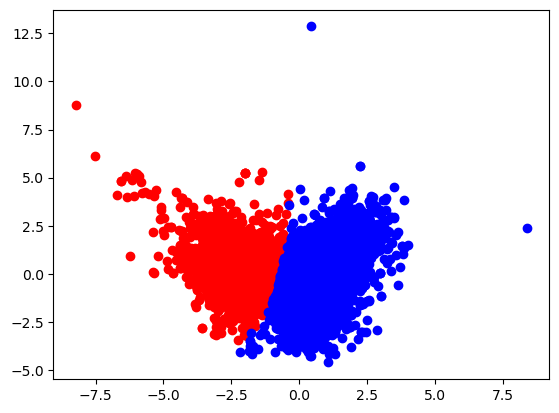

In [100]:
gmm= GaussianMixture(n_components=2)
wine_type_df['GMM'] =gmm.fit_predict(wine_type_pca)
#print(p_train.groupby('price_range')['gmm'].value_counts())
wine_type_df['GF1']= wine_type_pca[:,0]
wine_type_df['GF2']= wine_type_pca[:,1]
labels = np.unique(wine_type_df['GMM'].values)
for label in labels:
    XX = wine_type_df[wine_type_df['GMM'] == label]
    plt.scatter(x=XX['GF1'],y=XX['GF2'],color=colors[label])

In [101]:
print('GMM Grouping Result')
print(wine_type_df.groupby(wine_type)['GMM'].value_counts())
print('Silhouette_Score')
print(silhouette_score(wine_type_pca,wine_type_df['GMM']))
print(silhouette_samples(wine_type_pca,wine_type_df['GMM']))

GMM Grouping Result
type_num  GMM
0         1      4736
          0       162
1         0      1570
          1        29
Name: GMM, dtype: int64
Silhouette_Score
0.44453768265969823
[0.33836155 0.34081437 0.36748881 ... 0.51197842 0.60740168 0.20083115]


[-1  0  1]


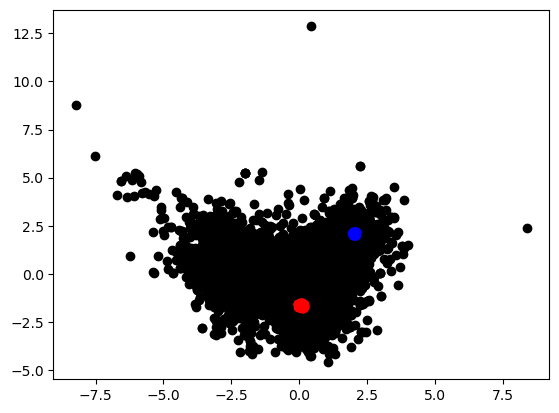

In [102]:
dbscan= DBSCAN(eps=0.1,min_samples=30)
wine_type_df['DBScan'] = dbscan.fit_predict(wine_type_pca)
#print(p_train.groupby('price_range')['dbscan'].value_counts())

wine_type_df['feature1']= wine_type_pca[:,0]
wine_type_df['feature2']= wine_type_pca[:,1]

labels = np.unique(wine_type_df['DBScan'].values)
print(labels)

for label in labels:
    XX = wine_type_df[wine_type_df['DBScan']==label]
    plt.scatter(x=XX['feature1'],y= XX['feature2'],color= colors[label])

In [103]:
print('DBScan Grouping Result')
print(wine_type_df.groupby(wine_type)['DBScan'].value_counts())
print('Silhouette_Score')
print(silhouette_score(wine_type_pca,wine_type_df['DBScan']))
print(silhouette_samples(wine_type_pca,wine_type_df['DBScan']))

DBScan Grouping Result
type_num  DBScan
0         -1        4811
           0          55
           1          32
1         -1        1599
Name: DBScan, dtype: int64
Silhouette_Score
-0.3809571322694454
[-0.73268838 -0.45358285 -0.10513039 ... -0.17550064 -0.06172573
 -0.3488995 ]


2.1162645175839248
[0 1 2 3]
[[ 0.5441899  -0.79209868]
 [ 8.39350069  2.40573673]
 [ 0.42649347 12.85530677]
 [-8.22208085  8.8002522 ]]


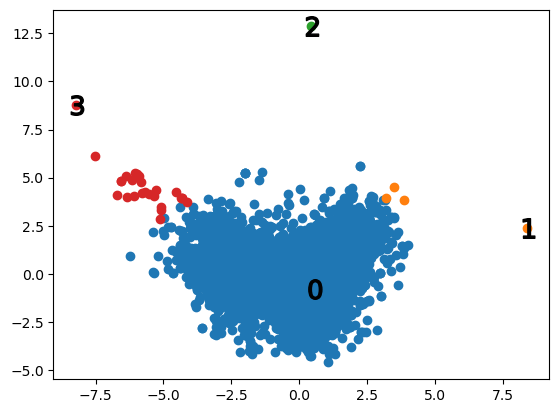

In [104]:
bw = estimate_bandwidth(wine_type_pca)
MS = MeanShift(bandwidth=bw)
lda_hat = MS.fit_predict(wine_type_pca)
print(bw)
print(np.unique(lda_hat))
wine_type_df['BW']=lda_hat
centers = MS.cluster_centers_
print(centers)
labels = np.unique(lda_hat)
for label in labels:
    XX = wine_type_pca[lda_hat==label]
    center= centers[label]
    plt.scatter(x=XX[:,0],y=XX[:,1])
    plt.scatter(x=center[0],y=center[1],s=200,color='k',marker='$%d$' % label)

In [105]:
print('BandWidth Grouping Result')
print(wine_type_df.groupby(wine_type)['BW'].value_counts())
print('Silhouette_Score')
print(silhouette_score(wine_type_pca,wine_type_df['BW']))
print(silhouette_samples(wine_type_pca,wine_type_df['BW']))

BandWidth Grouping Result
type_num  BW
0         0     4893
          1        4
          2        1
1         0     1573
          3       26
Name: BW, dtype: int64
Silhouette_Score
0.4404048894893189
[-0.41426911  0.67838802  0.63930026 ...  0.51631287  0.44251063
  0.63950577]


[0 1]
[[ 0.03459075 -0.03617785]
 [ 0.42649347 12.85530677]]


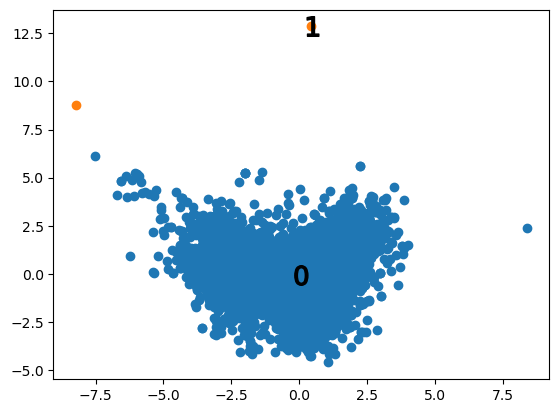

In [106]:
MS = MeanShift(bandwidth=5)
lda_hat = MS.fit_predict(wine_type_pca)
print(np.unique(lda_hat))
wine_type_df['BW5']=lda_hat
centers = MS.cluster_centers_
print(centers)
labels = np.unique(lda_hat)
for label in labels:
    XX = wine_type_pca[lda_hat==label]
    center= centers[label]
    plt.scatter(x=XX[:,0],y=XX[:,1])
    plt.scatter(x=center[0],y=center[1],s=200,color='k',marker='$%d$' % label)

In [257]:
print('BandWidth Grouping Result')
print(wine_type_df.groupby(wine_type)['BW5'].value_counts())
print('Silhouette_Score')
print(silhouette_score(wine_type_pca,wine_type_df['BW5']))
print(silhouette_samples(wine_type_pca,wine_type_df['BW5']))

BandWidth Grouping Result
type_num  BW5
0         0      4897
          1         1
1         0      1598
          1         1
Name: BW5, dtype: int64
Silhouette_Score
0.7584686318619159
[0.60652248 0.83257113 0.82410862 ... 0.7561765  0.73405124 0.80294191]


[0 1 2 3 4 5 6 7]
[[ 0.5180222  -0.93935289]
 [-2.50143626  0.49146163]
 [-5.47965447  4.1824756 ]
 [-1.85141272  5.12762988]
 [ 8.39350069  2.40573673]
 [ 0.42649347 12.85530677]
 [-7.52408049  6.11363776]
 [-8.22208085  8.8002522 ]]


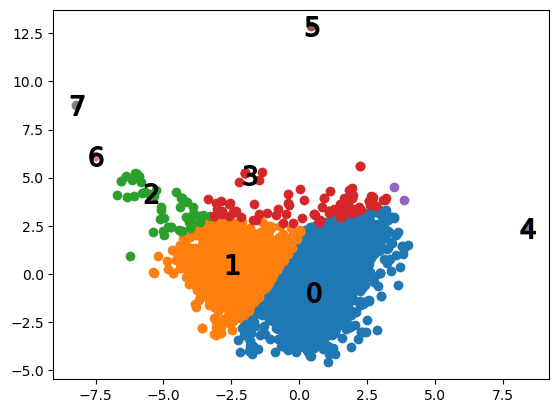

In [244]:
MS = MeanShift(bandwidth=1.5)
lda_hat = MS.fit_predict(wine_type_pca)
print(np.unique(lda_hat))
wine_type_df['BW1']=lda_hat
centers = MS.cluster_centers_
print(centers)
labels = np.unique(lda_hat)
for label in labels:
    XX = wine_type_pca[lda_hat==label]
    center= centers[label]
    plt.scatter(x=XX[:,0],y=XX[:,1])
    plt.scatter(x=center[0],y=center[1],s=200,color='k',marker='$%d$' % label)

In [107]:
print('BandWidth Grouping Result')
print(wine_type_df.groupby(wine_type)['BW1'].value_counts())
print('Silhouette_Score')
print(silhouette_score(wine_type_pca,wine_type_df['BW1']))
print(silhouette_samples(wine_type_pca,wine_type_df['BW1']))

BandWidth Grouping Result


KeyError: 'Column not found: BW1'

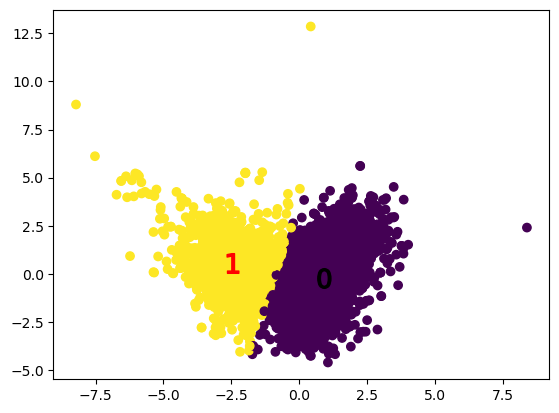

In [110]:
km = KMeans(n_clusters=2, max_iter= 500).fit(wine_q)
wine_type_df['cluster']=km.labels_
data=wine_type_pca
points = data
num_clusters = 2
fcenters, flabels = find_clusters(points, num_clusters)
cmap = plt.cm.get_cmap('viridis',num_clusters)
c1x,c1y = fcenters[0]
c2x,c2y = fcenters[1]
plt.scatter(points[:,0],points[:,1],c=flabels, cmap=cmap)
plt.scatter(x=c1x,y=c1y,s=200,color='k',marker='$%d$' % 0)
plt.scatter(x=c2x,y=c2y,s=200,color='r',marker='$%d$' % 1)

In [260]:
print('KMeans Grouping Result')
print(wine_type_df.groupby(wine_type)['cluster'].value_counts())
print('Silhouette_Score')
print(silhouette_score(wine_type_pca,wine_type_df['cluster']))
print(silhouette_samples(wine_type_pca,wine_type_df['cluster']))

KMeans Grouping Result
type_num  cluster
0         0          3588
          1          1310
1         1          1516
          0            83
Name: cluster, dtype: int64
Silhouette_Score
0.25947041448462593
[ 0.39672485  0.09766586 -0.27756101 ...  0.42753702  0.44638239
  0.29037499]


In [46]:
wine_Affin = AffinityPropagation(preference = -50).fit(wine_type_pca)
wine_type_df['Affinity'] = wine_Affin_labels_
Affin_center = wine_Affin_cluster_centers_indices_
print("Estimated number of Clusters : %d" % Affin_center)

D:\anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(


NameError: name 'wine_Affin_labels_' is not defined

In [145]:
# 품질과 군집화의 상관관계 파악
wine_qual=wine_q['quality']
wine_q.drop(['quality'],axis=1,inplace=True)
np.unique(wine_qual.values)

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [146]:
wine_qual_pca = PCA(n_components=7)
wine_scaled_quality= std.fit_transform(wine_q)
wine_qual_pca = wine_qual_pca.fit_transform(wine_scaled_quality)
wine_qual_df= pd.DataFrame(wine_qual_pca,columns=['q3','q4','q5','q6','q7','q8','q9'])
wine_qual_df['qual'] = wine_qual

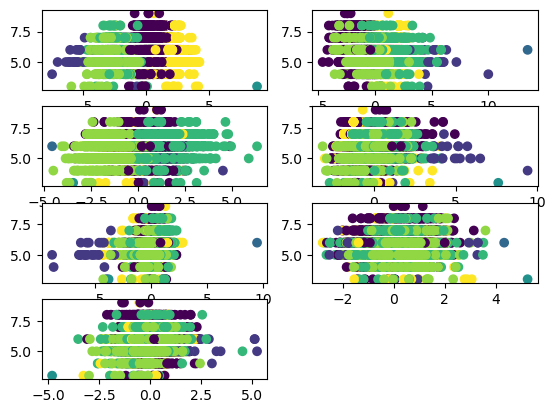

In [147]:
# KMeans
qkm = KMeans(n_clusters=7, max_iter= 2000).fit(wine_q)
wine_qual_df['cluster']=qkm.labels_+3
data=wine_qual_pca
points = data
num_clusters = 7
centers, labels = find_clusters(points, num_clusters)
cmap = plt.cm.get_cmap('viridis',num_clusters)
for i in range(1,8):
    plt.subplot(4,2,i)
    plt.scatter(points[:,i-1],wine_qual,c=labels, cmap=cmap)

[3 4 5 6 7 8 9]


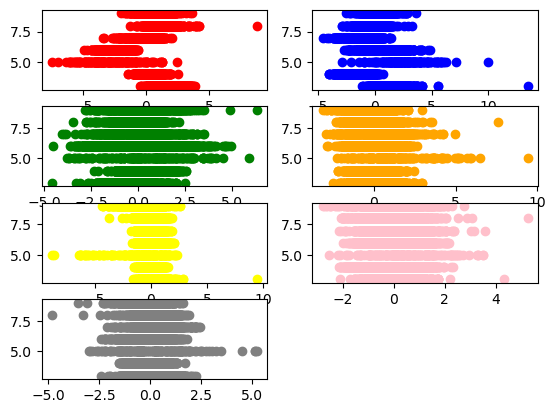

In [157]:
qgmm= GaussianMixture(n_components=7)
wine_qual_df['GMM'] = qgmm.fit_predict(wine_qual_pca)
wine_qual_df['GMM'] = wine_qual_df['GMM']+3
#print(p_train.groupby('price_range')['gmm'].value_counts())
labels = np.unique(wine_qual_df['GMM'])
p = 1
print(labels)
for label in labels:
    plt.subplot(4,2,p)
    plt.scatter(points[:,p-1],wine_qual_df['GMM'],color=colors[label-3])
    p=p+1

3.427708448401616
[0 1 2 3 4 5 6 7]
[[ 0.51846033 -0.42013714  0.07728535 -0.05258465 -0.02138343 -0.08449809
   0.05347494]
 [-5.29314708  5.05660793  1.39014447  3.96852026 -5.26504046 -0.70906722
   1.16996611]
 [-3.457536    2.85358262  1.08178431  4.41739896 -0.10319504  2.42061966
   4.33010407]
 [ 8.79204618  0.48872536 -3.44637983  7.60588191 -3.77766495  5.24479761
  -4.81530054]
 [ 3.52840211 -0.54685229  4.87608812  2.09118384 -0.03233484  0.57386107
  -3.09606297]
 [ 1.59177137 -0.16373919  6.33758205  2.95399056  1.9823427  -1.74009138
  -3.53736833]
 [ 1.489551   13.47503975 -4.56816401 -2.4711695   9.45532214  4.32601581
  -0.09173243]
 [-7.40952107 10.00996188  4.52185907  9.39966053 -8.67700635  0.33644146
   3.02222981]]


IndexError: index 7 is out of bounds for axis 1 with size 7

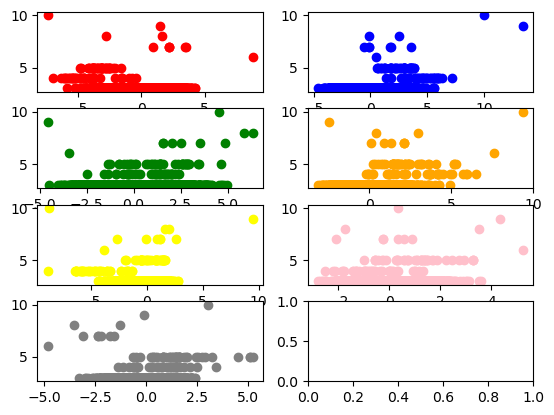

In [149]:
qbw = estimate_bandwidth(wine_qual_pca)
MS = MeanShift(bandwidth=qbw)
qlda_hat = MS.fit_predict(wine_qual_pca)
print(qbw)
print(np.unique(qlda_hat))
wine_qual_df['BW']=qlda_hat+3
qcenters = MS.cluster_centers_
labels = np.unique(qlda_hat+3)
p=1
for label in labels:
    plt.subplot(4,2,p)
    plt.scatter(x=points[:,p-1],y=wine_qual_df['BW'],color=colors[label-3])
    p=p+1

[-1  0  1  2  3  4  5  6]


IndexError: index 7 is out of bounds for axis 1 with size 7

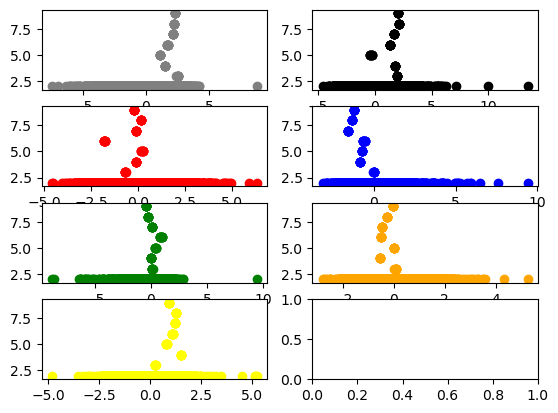

In [156]:
qdbscan= DBSCAN(eps=0.26,min_samples=7)
wine_qual_df['DBScan'] = qdbscan.fit_predict(wine_qual_pca)
#print(p_train.groupby('price_range')['dbscan'].value_counts())

labels = np.unique(wine_qual_df['DBScan'].values)
print(labels)

for label in labels:
    plt.subplot(4,2,p)
    plt.scatter(x=points[:,p-1],y=wine_qual_df['DBScan'],color=colors[label-1])
    p=p+1

In [158]:
print('Quality GMM Grouping Result')
print(wine_qual_df.groupby(wine_qual)['GMM'].value_counts())
print()
print('Quality KMeans Grouping Result')
print(wine_qual_df.groupby(wine_qual)['cluster'].value_counts())

Quality GMM Grouping Result
quality  GMM
3        5        7
         8        7
         6        6
         4        3
         9        3
         3        2
         7        2
4        6       54
         7       47
         9       31
         4       28
         3       23
         8       21
         5       12
5        3      618
         6      580
         9      248
         8      231
         4      210
         7      149
         5      102
6        4      706
         3      599
         6      557
         8      497
         7      210
         9      207
         5       60
7        4      458
         6      177
         8      146
         3      123
         7      123
         9       42
         5       10
8        4       83
         8       36
         7       28
         3       17
         6       15
         9       12
         5        2
9        4        4
         9        1
Name: GMM, dtype: int64

Quality KMeans Grouping Result
quality  cluster
3     

In [159]:
print('Quality BandWidth Grouping Result')
print()
print(wine_qual_df.groupby(wine_qual)['BW'].value_counts())
print('Quality DBScan Grouping Result')
print()
print(wine_qual_df.groupby(wine_qual)['DBScan'].value_counts())

Quality BandWidth Grouping Result

quality  BW
3        3       26
         4        3
         6        1
4        3      212
         5        2
         4        1
         10       1
5        3     2102
         4       20
         5       14
         7        1
         8        1
6        3     2798
         5       18
         4       13
         7        5
         8        1
         9        1
7        3     1072
         5        6
         4        1
8        3      192
         5        1
9        3        5
Name: BW, dtype: int64
Quality DBScan Grouping Result

quality  DBScan
3        2           30
4        2          216
5        2         2138
6        2         2827
         6            9
7        2         1043
         7            8
         3            7
         4            7
         5            7
         8            7
8        2          185
         9            8
9        2            5
Name: DBScan, dtype: int64
